In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
color_codes={'Indo-European':'#17aa5a','Uralic':'#94f321','Turkic':'#2196f3','Afroasiatic':'#212bf3','Sino-Tibetan':'#7f21f3','Japonic':'#8b1492',
            'Koreanic':'#f32194','Niger-Congo':'#f37f21','Semitic':'#f3e821',
            'Austronesian':'black'}

In [2]:
human=pd.read_csv("./cluster_data/human_preferences_by_lang_unpivoted.csv")
df=pd.read_csv("./cluster_data/model_preferences_by_lang_gpt4.csv")
family=pd.read_csv("./cluster_data//lang_track_progress_family.csv")

In [3]:
mask = df.apply(lambda x: x.astype(str).str.contains('---')).any()
df = df.drop(columns=mask[mask].index)
df=df.set_index('criterion')
df=df.T.reset_index()
df=df.rename(columns={'index':'Languages'})
df.iloc[:,1:]=df.iloc[:,1:].astype(float)

In [4]:
df.columns=['Languages','Species','Age','Fitness','Gender','Social Status','No. Characters']

df=pd.melt(df,value_name='gpt_est',var_name='Label',id_vars='Languages',value_vars=['Species','Age','Fitness','Gender','Social Status','No. Characters'])

In [5]:
## rescale both quantities to the interval [0,1]
df['gpt_est']=df['gpt_est']/100

In [6]:
df_final=df.merge(human,on=['Languages','Label'])
family=family.loc[:,['family','name','lang']].rename(columns={'lang':'Languages','family':'Family'})
df_final=df_final.merge(family,on=['Languages'])
df_final['sqe']=(((df_final.gpt_est/1)-(df_final.final_est/1))**2)

In [7]:
df_final.loc[df_final.Languages=='en',['Languages','Label','gpt_est','final_est','sqe','tot_pop']]

,Languages,Label,gpt_est,final_est,sqe,tot_pop
72,en,Species,1.0000,79.744546,6200.703450,1.359135e+09
73,en,Age,0.9592,72.415551,5106.010070,1.359135e+09
74,en,Fitness,0.6296,57.612783,3247.083189,1.359135e+09
75,en,Gender,0.5000,56.254381,3108.550993,1.359135e+09
76,en,Social Status,0.8418,66.178099,4268.832012,1.359135e+09
77,en,No. Characters,0.9750,75.352562,5532.021678,1.359135e+09


In [8]:
df_agg=df_final.groupby(['Languages','Family','name']).agg({'tot_pop':np.mean,'sqe':np.sum}).reset_index()

df_agg['sqe']=df_agg['sqe']**0.5

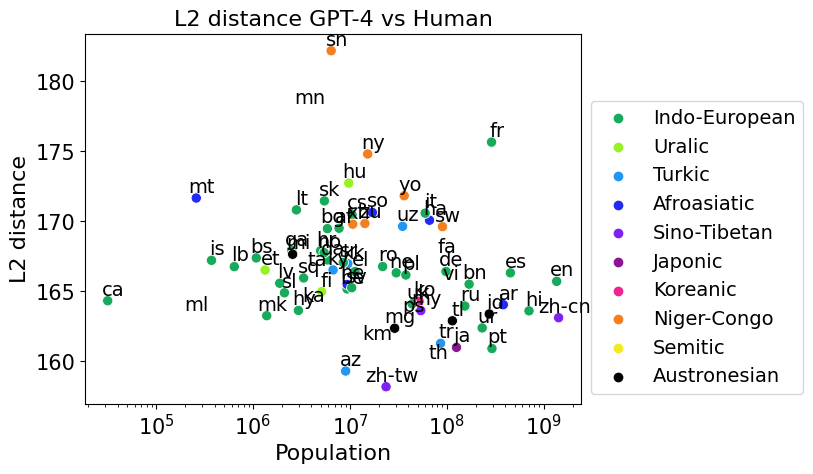

In [9]:
ax=sns.scatterplot(data=df_agg,x='tot_pop',y='sqe',hue='Family', palette=color_codes,hue_order=color_codes.keys(),s=55)
#plt.yscale('log')
plt.xscale('log')
plt.title('L2 distance GPT-4 vs Human',size=16)
plt.ylabel('L2 distance',size=16)
plt.xlabel('Population',size=16)
#lgd=sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
lgd = ax.legend(loc=3, bbox_to_anchor=(1,0),fontsize=14)
for i in range(df_agg.shape[0]):
    plt.annotate(df_agg.Languages.values[i], (df_agg.tot_pop.values[i], df_agg.sqe.values[i]), textcoords="offset points", xytext=(4,4), ha='center',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
plt.savefig('mse_scatter2_log.png', transparent=True,bbox_extra_artists=(lgd,),bbox_inches='tight')

plt.savefig('./cluster_data/fig_scatter_l2.pdf',dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')

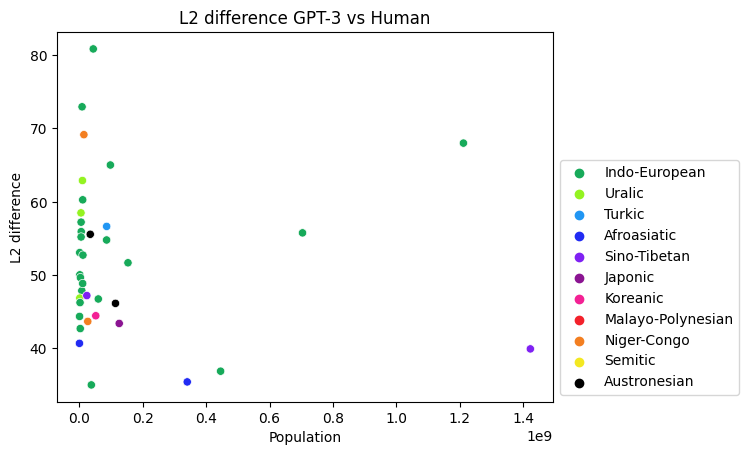

In [26]:
ax=sns.scatterplot(data=df_agg,x='tot_pop',y='sqe',hue='Family', palette=color_codes,hue_order=color_codes.keys())
#plt.yscale('log')
#plt.xscale('log')
plt.title('L2 difference GPT-3 vs Human')
plt.ylabel('L2 difference')
plt.xlabel('Population')
#lgd=sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
lgd = ax.legend(loc=3, bbox_to_anchor=(1,0))
plt.savefig('mse_scatter2.png', transparent=True,bbox_extra_artists=(lgd,),bbox_inches='tight')

plt.savefig('mse_scatter2.pdf',dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')